In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

In [15]:
df = pd.read_csv('2016_04_01_a549_48hr_batch1_consensus_median_feature_select_dmso.csv.gz')
df = ds.clean_moas(df)
df = ds.drop_feats(df, 40)

dropped 60 features


In [16]:
print(df.shape)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
mad_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))
mad_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()

(1143, 501)


In [16]:
df = pd.read_csv('2016_04_01_a549_48hr_batch1_dmso_spherized_profiles_with_input_normalized_by_dmso_consensus_median.csv.gz')
df = ds.clean_moas(df)
# df = ds.drop_feats(df, 30)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
sph_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))
sph_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()

In [17]:
sph_pre_r

0.056404115953036016

In [5]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/efficient_net/aggregated/aggregated_efficientnet_median.csv', low_memory=False)

In [6]:
sphere = normalize(
    profiles=df,
    features=[f for f in df.columns if f.startswith("eff")],
    samples="Metadata_broad_sample == 'DMSO'",
    method='spherize',
    output_file='none'
)

In [7]:
features = [f for f in df.columns if f.startswith("eff")]
con = aggregate(
    sphere,
    strata=["Metadata_broad_sample"],
    features=features
)
meta = pd.read_csv('meta.csv')
consensus = pd.merge(con, meta, how='left', on=['Metadata_broad_sample'])

In [8]:
e = eval.evaluation(consensus)
eff_pre = eval.prec_mean(e.eval(consensus, operation = 'precision_recall'))
eff_pre_r = e.eval(consensus, operation = 'precision_recall', eval_range='R').precision.mean()

6400 features were identified


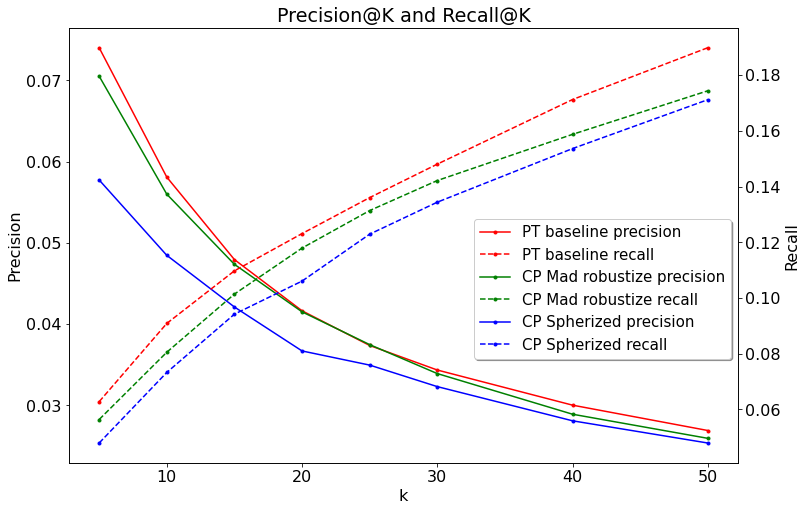

In [23]:
index1 = eff_pre
index2 = mad_pre
index3 = sph_pre
label_1 = "PT baseline"
label_2 = "CP Mad robustize"
label_3 = "CP Spherized"
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Precision@K and Recall@K")
ax2 = ax.twinx()
ax.set_xlabel("k")
ax.set_ylabel('Precision')
ax2.set_ylabel('Recall')
lns1 = ax.plot(index1["k"], index1["precision"], marker=".", color="r", label=f'{label_1} precision')
lns2 = ax2.plot(index1["k"], index1["recall"], marker=".", linestyle='dashed', color="r",
                label=f'{label_1} recall')


lns3 = ax.plot(index2["k"], index2["precision"], marker=".", color="g", label=f'{label_2} precision')
lns4 = ax2.plot(index2["k"], index2["recall"], marker=".", linestyle='dashed', color="g",
                label=f'{label_2} recall')
lns5 = ax.plot(index3["k"], index3["precision"], marker=".", color="b", label=f'{label_3} precision')
lns6 = ax2.plot(index3["k"], index3["recall"], marker=".", linestyle='dashed', color="b",
                label=f'{label_3} recall')
lns = lns1 + lns2 + lns3 + lns4 + lns5 + lns6
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='right', prop={'size': 15}, shadow=True, bbox_to_anchor=(1,0.4))
plt.show()

In [11]:
eff_pre = pd.read_csv('../plot_storage/pre_tr_eff_pre.csv')
mad_pre = pd.read_csv('../plot_storage/precision_doof_mad_pre.csv')
sph_pre= pd.read_csv('../plot_storage/precision_doof_sph_pre.csv')

In [ ]:
eff 0.07220107296110034
mad 0.06703344559051595
sph 0.056404115953036016

In [1]:
eff_pre

NameError: name 'eff_pre' is not defined

In [13]:
eff_pre


,Unnamed: 0,k,precision,recall
0,0,5.0,0.074016,0.062781
1,1,10.0,0.058093,0.090867
2,2,15.0,0.047944,0.109739
3,3,20.0,0.041645,0.123110
4,4,25.0,0.037375,0.136027
5,5,30.0,0.034354,0.148038
6,6,40.0,0.030031,0.171221
7,7,50.0,0.026912,0.189822
